In [ ]:
#Cargamos las bibliotecas para trabajar en Álgebra lineal.
import numpy as np 
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt

# **Ejercicio 1.**

In [ ]:
#Definimos las matrices que se nos indica.
A = np.array([[1,3],[-1,7]])
B = np.array([[5,2],[1,2]])
I = np.array([[1,0],[0,1]])
#Vemos si nos salieron como deseamos.
print(A)
print(B)
print(I)

[[ 1  3]
 [-1  7]]
[[5 2]
 [1 2]]
[[1 0]
 [0 1]]


In [ ]:
#Calculamos el resultado de 2*I+3*A+A@B
2*I + 3*A + A@B

array([[13, 17],
       [-1, 35]])

# **Ejercicio 2.**
Los polinomios característicos y el Teorema de Cayley-Hamilton.






In [ ]:
#podemos realizar una matriz aleatoria para esto.
N = np.random.randint(0,10,[2,2])
print(N)
I = np.array([[1,0],[0,1]])

[[3 8]
 [6 1]]


In [ ]:
N@N - (np.trace(N))*N + (la.det(N))*I

array([[0., 0.],
       [0., 0.]])

# **EJERCICIO 3.**
Resuelva el sistema de ecuaciones:

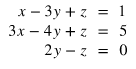

de dos formas, utilizando el Método de Eliminación Gaussiana y utilizando la función scipy.linalg.solve

In [ ]:
#Método de eliminación Gaussiana.
#Intercambio de posición de renglones.
def switch_rows(A,i,j):
  'Intercambiar renglones i y j en la matriz A.'
  n = A.shape[0]
  E = np.eye(n)
  E[i,i] = 0
  E[j,j] = 0
  E[i,j] = 1
  E[j,i] = 1
  return E @ A
#Multiplicar un renglón por una constante no nula.
def scale_row(A,k,i):
  'Multiplicar el renglón i por k en la matriz A.'
  n = A.shape[0]
  E = np.eye(n)
  E[i,i] = k
  return E @ A
#Sumar un múltiplo de un renglón a otro renglón.
def add_row(A,k,i,j):
  'Sumar k veces el renglón j al renglón i en la matriz A.'
  n = A.shape[0]
  E = np.eye(n)
  if i == j:
    E[i,i] = k + 1
  else:
      E[i,j] = k
  return E @ A

In [ ]:
#Definimos la matriz.
M = np.array([[1,-3,1],[3,-4,1],[0,2,-1]])
print(M)

[[ 1 -3  1]
 [ 3 -4  1]
 [ 0  2 -1]]


In [ ]:
#Matriz Aumentada.
A = np.hstack([M,np.eye(3)])
print(A)

[[ 1. -3.  1.  1.  0.  0.]
 [ 3. -4.  1.  0.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
#Comenzamos a utilizar el método Gauss Jordan.
#1)-3L1 + L2 ==>L2
A1 = add_row(A,-3,1,0)
print(A1)


[[ 1. -3.  1.  1.  0.  0.]
 [ 0.  5. -2. -3.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
#2)(-2/5)L2+L3 ==> L3
A2_temp = add_row(A1, -2/5, 2, 1)
#3)(3/5)L2
A2 = scale_row(A2_temp, 3/5, 1)
A2 = add_row(A2,1,0,1)
print(A2)

[[ 1.   0.  -0.2 -0.8  0.6  0. ]
 [ 0.   3.  -1.2 -1.8  0.6  0. ]
 [ 0.   0.  -0.2  1.2 -0.4  1. ]]


In [ ]:
A3_temp1 = scale_row(A2,-5,2)

A3_temp2 = scale_row(A3_temp1,-1/1.2,1)

A3_temp3 = add_row(A3_temp2, 0.4, 1, 2)

A3_temp3 = add_row(A3_temp2, 0.2, 0, 2)

A3_temp3 = add_row(A3_temp3, -1, 1, 2)

A3 = scale_row(A3_temp3, -1/2.5, 1)
print(np.round(A3, 2))

[[ 1.  0.  0. -2.  1. -1.]
 [ 0.  1. -0. -3.  1. -2.]
 [ 0.  0.  1. -6.  2. -5.]]


In [ ]:
#Inversa
Minv = A3[:,3:]
print(Minv)

[[-2.  1. -1.]
 [-3.  1. -2.]
 [-6.  2. -5.]]


In [ ]:
#Agregamos el vector resultados.
R = np.array([1,5,0])
#Hacemos que M inversa actue sobre R para obtener el resultado.
print(np.round(Minv @ R))

[3. 2. 4.]


In [ ]:
#Ahora utilizando scipy.linalg.solve
solv = la.solve(M,R)
print(solv)

[3. 2. 4.]


# **Ejercicio 4.**
Dadas las siguientes matrices B1,B2,B3.\
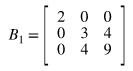
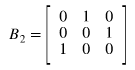
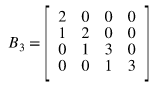

Encuentra los eigenvalores y eigenvectores de cada matriz utilizando la función de scipy.linalg.eig(), y contrasta tus resultados en cada caso con los que se desarrollan en los ejemplos de la Wikipedia.

In [ ]:
#Ingresamos las matrices.
B1 = np.array([[2,0,0],[0,3,4],[0,4,9]])
B2 = np.array([[0,1,0],[0,0,1],[1,0,0]])
B3 = np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])
print(B1)
print('----------------------------------------')
print(B2)
print('----------------------------------------')
print(B3)


[[2 0 0]
 [0 3 4]
 [0 4 9]]
----------------------------------------
[[0 1 0]
 [0 0 1]
 [1 0 0]]
----------------------------------------
[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]


In [ ]:
#Eigenvalores/vectores con cipy.linalg.eig()
eigvals1, eigvecs1 = la.eig(B1)
eigvals2, eigvecs2 = la.eig(B2)
eigvals3, eigvecs3 = la.eig(B3)

#Imprimimos para B1:
print('Eigenvalores B1')
print(np.round(eigvals1,2))
print('Eigenvectores B1')
print(np.round(eigvecs1,2))
print('---------------------------')
#Imprimimos para B2:
print('Eigenvalores B2')
print(np.round(eigvals2,2))
print('Eigenvectores B2')
print(np.round(eigvecs2,2))
print('---------------------------')
#Imprimimos para B3:
print('Eigenvalores B3')
print(np.round(eigvals3,2))
print('Eigenvectores B3')
print(np.round(eigvecs3,2))

Eigenvalores B1
[11.+0.j  1.+0.j  2.+0.j]
Eigenvectores B1
[[ 0.    0.    1.  ]
 [ 0.45  0.89  0.  ]
 [ 0.89 -0.45  0.  ]]
---------------------------
Eigenvalores B2
[-0.5+0.87j -0.5-0.87j  1. +0.j  ]
Eigenvectores B2
[[ 0.58+0.j   0.58-0.j  -0.58+0.j ]
 [-0.29+0.5j -0.29-0.5j -0.58+0.j ]
 [-0.29-0.5j -0.29+0.5j -0.58+0.j ]]
---------------------------
Eigenvalores B3
[3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Eigenvectores B3
[[ 0.    0.    0.    0.  ]
 [ 0.    0.    0.58 -0.58]
 [ 0.    0.   -0.58  0.58]
 [ 1.   -1.    0.58 -0.58]]


In [ ]:
#Matriz de eigenvectores en B1 (para observar.)
print(eigvecs1)


[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]


In [ ]:
#Realizamos el ejemplo en wikipedia y comparamos.
#matriz de eigenvectores:
B1vec = np.array([[0,0,1],[0.4472136,0.89442719,0],[0.89442719,-0.4472136,0]])
print('Matriz de Eigenvalores de B1')
print(B1vec)

La Matriz de Eigenvalores de B1
[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]


In [ ]:
#Observamos los eigenvalores de B1
print(eigvals1)

[11.+0.j  1.+0.j  2.+0.j]


In [ ]:
#Definimos la diagonal de eigenvalores.
B1diag = np.diag((11,1,2))
print('Matriz Diagonal de Eigenvalores de B1')
print(B1diag)

Matriz Diagonal de Eigenvalores de B1
[[11  0  0]
 [ 0  1  0]
 [ 0  0  2]]


In [ ]:
#Determinamos la B1 con lo siguiente: M = P D P^{-1}
M = B1vec@B1diag@la.inv(B1vec)
print(M)

[[2.         0.         0.        ]
 [0.         3.00000004 4.00000003]
 [0.         4.00000003 8.99999996]]


In [ ]:
#Calculamos la potencia k=25 de B1
k=25
B1vec_inv = la.inv(B1vec)
print('Matriz de Eigenvectores:')
print(B1vec)
print('Matriz inversa de B1vec:')
print(B1vec_inv)

Matriz de Eigenvectores:
[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]
Matriz inversa de B1vec:
[[-0.          0.4472136   0.89442719]
 [-0.          0.89442719 -0.4472136 ]
 [ 1.          0.          0.        ]]


In [ ]:
#Propiedad de diagonalización:
print(B1vec@B1diag**25@B1vec_inv)

[[ 3.35544320e+07  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.12702763e+17 -1.02540552e+18]
 [ 0.00000000e+00 -1.02540552e+18 -2.05081101e+18]]


# **Actividad 5.**
Se tienen los siguientes 8 puntos:

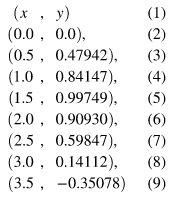

Encuentre un polinomio interpolante p(x) que pase por los 8 puntos.
Sobreponga la función y = sin(x) y contrástela con el polinomio p(x).

In [ ]:
#Polinomio de grado 7.
x = np.array([0,0.5,1,1.5,2,2.5,3,3.5])
y = np.array([0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078]).reshape(8,1)

X = np.column_stack([x**k for k in range(0,8)])
#Solución para Xa=y usando spicy.linalg=la
a = la.solve(X,y)
print(a)

[[ 0.00000000e+00]
 [ 1.00067181e+00]
 [-3.70788889e-03]
 [-1.58867889e-01]
 [-8.30222222e-03]
 [ 1.31964444e-02]
 [-1.54488889e-03]
 [ 2.46349206e-05]]


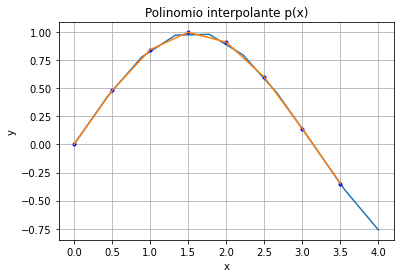

In [ ]:
#Graficamos.
#Resultados del polinomio interpolante de a0,a1,a2-
xs = np.linspace(0,4,10)
ys_temp = 0
for k in range(0,8):
  ys = ys_temp + a[k]*xs**k
  ys_temp = ys
plt.plot(xs,ys,x,y,'b.',x,np.sin(x))
plt.grid()
plt.title('Polinomio interpolante p(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# **Actividad 6.**

Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.

No pudo leer el csv. Se me imposibilitó realizar esta actividad.